**ML Project 01 - Mercedes-Benz Greener Manufacturing**

*DESCRIPTION*
Reduce the time a Mercedes-Benz spends on the test bench.
Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger
safety cell with the crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand
the European leader among premium carmakers. Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, 
customers can choose the customized Mercedes-Benz of their dreams.To ensure the safety and reliability of every unique car configuration before they hit 
the road, Daimler’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency
are paramount on Daimler’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and 
time-consuming without a powerful algorithmic approach.You are required to reduce the time that cars spend on the test bench. Others will work with a
dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will 
contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.
#Following actions should be performed:
----If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
----Check for null and unique values for test and train sets
----Apply label encoder.
----Perform dimensionality reduction.
----Predict your test_df values using xgboost   

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

** Import both the datasets train and test --**

In [2]:

data=pd.read_csv("train.csv")
data2=pd.read_csv("test.csv")



* Exploaratory Data Analysis

In [3]:
 
# first five rows
data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data2.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
# check all the columns name
data.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)>

In [6]:
# check the information about data(mean median, percentile, max....)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4209.0,4205.960798,2437.608688,0.00,2095.00,4220.00,6314.00,8417.00
y,4209.0,100.669318,12.679381,72.11,90.82,99.15,109.01,265.32
X10,4209.0,0.013305,0.114590,0.00,0.00,0.00,0.00,1.00
X11,4209.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
X12,4209.0,0.075077,0.263547,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...
X380,4209.0,0.008078,0.089524,0.00,0.00,0.00,0.00,1.00
X382,4209.0,0.007603,0.086872,0.00,0.00,0.00,0.00,1.00
X383,4209.0,0.001663,0.040752,0.00,0.00,0.00,0.00,1.00
X384,4209.0,0.000475,0.021796,0.00,0.00,0.00,0.00,1.00


In [7]:
# check the null values--- there is no null values
data.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [8]:
data.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object

In [9]:
# information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [10]:
# there are 369 columns are integer and 8 object and 1 is float--float is a target variable
int_col = len(data.select_dtypes(include=['int64']).columns)
flt_col = len(data.select_dtypes(include=['float64']).columns) 
obj_col = len(data.select_dtypes(include=['object']).columns)



In [11]:
print("The No of integer columns are:", int_col)
print("The No of object columns are:", obj_col)
print("The No of float columns are:", flt_col)



The No of integer columns are: 369
The No of object columns are: 8
The No of float columns are: 1


In [12]:

int_col = len(data2.select_dtypes(include=['int64']).columns)
obj_col = len(data2.select_dtypes(include=['float64']).columns) 
flt_col = len(data2.select_dtypes(include=['object']).columns)




In [13]:
print("The No of integer Features are:", int_col)
print("The No of object Features are:", obj_col)
print("The No of float Features are:", flt_col)




The No of integer Features are: 369
The No of object Features are: 0
The No of float Features are: 8


* Read the data and understood that Column Y in the train dataset is the target column (outcome Variable) which is not there in Test dataset.
*and we will drop the very first Column "ID" which will not be needed.

In [14]:

data.drop("ID",inplace=True,axis=1)
data2.drop("ID",inplace=True,axis=1)

In [15]:
data.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


#  Now will check the variance and if for any column(s), the variance is equal to zero, then need to remove those variable(s).


In [16]:
data.var()[data.var() == 0].index.values

array(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347'], dtype=object)

In [17]:
# drop all the variance variable
threshold = 0.0
data.drop(data.var()[data.var() == threshold].index.values, axis=1,inplace=True)



In [18]:
data.shape

(4209, 365)

In [19]:
# after droping all the variable check the dataset
data.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#data2.var()[data2.var() == 0]

#data2.var()[data2.var() == 0].index.values



In [21]:
# drop all the variance variable
#threshold = 0.0
#data2.drop(data2.var()[data2.var() == threshold].index.values, axis=1,inplace=True)

data2.drop(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290','X293', 'X297', 'X330', 'X347'],axis=1,inplace=True)


#From above we can see there are 13 variables having variance equal to 0.
#these all variables contain constant value, hence variance is 0.
#as these variables have no variance, we can drop them as these are not useful for our model

In [22]:
data2.shape

(4209, 364)

In [23]:
# all the integer datatype in data_num
data_num=data.select_dtypes(include=["int64"])

In [24]:
# all the categorical vaiables are in data_cat 
data_cat=data.select_dtypes(include=["object"])

In [25]:
data_cat

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [26]:
data_num

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4207,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\Harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y'>

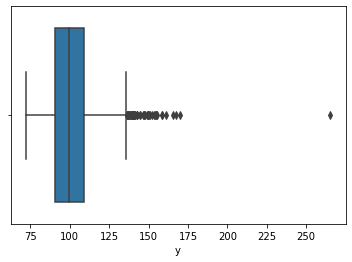

In [27]:
sns.boxplot(data.y)

In [28]:
# Outlier Detection


def outlier_detection(data_column):
    sorted(data_column)
    Q1, Q3=np.percentile(data_column,[25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    
    return lower_range, upper_range
    
    
    
    

In [29]:
l,u = outlier_detection(data.y)

In [30]:
print("Lower acceptable range value is ", l)
print("Upper acceptable range value is ", u)

Lower acceptable range value is  63.534999999999975
Upper acceptable range value is  136.29500000000002


In [31]:
data.drop(data[(data.y<l)|(data.y>u)].index, inplace=True)

C:\Users\Harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y'>

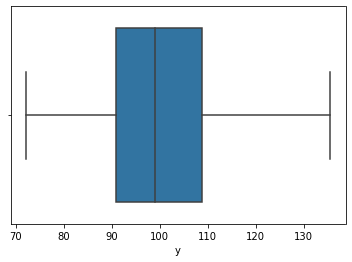

In [32]:
sns.boxplot(data.y)

In [33]:
# all the object variables
data.describe(include='object')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4159,4159,4159,4159,4159,4159,4159,4159
unique,47,27,43,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,359,826,1637,1906,4155,230,1030,272


In [34]:
# show all the object variables names
label_columns= data.describe(include=["object"]).columns.values
label_columns

array(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype=object)

In [35]:
#now create a Label Encoder and for columns identified in obj_col and apply Label Encoder to convert them
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [36]:

obj_cols = data.describe(include='object').T.index.values
for i in obj_cols:
  le.fit(data[i].append(data2[i]).values) # appending test values for same level of encoding
  data[i] = le.transform(data[i])
  data2[i] = le.transform(data2[i])


In [37]:
#import train_test_split 
from sklearn.model_selection import train_test_split

In [38]:
#y is a target feature so we drop this from features columns
x=data.drop("y",axis=1)



In [39]:
y=data[["y"]]

In [40]:
#split the train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4,test_size=.2)

In [41]:
print("The x_train shape is:",x_train.shape)
print("The x_test shape is:",x_test.shape)
print("The y_train shape is:",y_train.shape)
print("The y_test shape is:",y_test.shape)

The x_train shape is: (3327, 364)
The x_test shape is: (832, 364)
The y_train shape is: (3327, 1)
The y_test shape is: (832, 1)


In [42]:
x_test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
2512,19,8,4,2,3,20,10,23,0,0,...,0,0,1,0,0,0,0,0,0,0
3083,36,10,18,2,3,23,11,13,0,0,...,0,0,1,0,0,0,0,0,0,0
3537,50,1,18,6,3,24,3,9,0,0,...,1,0,0,0,0,0,0,0,0,0
2258,36,1,16,2,3,17,11,17,0,0,...,0,0,1,0,0,0,0,0,0,0
777,9,9,18,5,3,6,3,17,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
x_train.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
266,24,23,18,5,3,15,6,13,0,0,...,0,0,0,1,0,0,0,0,0,0
224,51,0,4,5,3,15,6,24,0,0,...,0,0,0,0,0,0,0,0,0,0
750,36,1,4,2,3,6,8,22,0,0,...,1,0,0,0,0,0,0,0,0,0
233,23,3,10,2,3,15,0,22,0,0,...,0,0,1,0,0,0,0,0,0,0
3082,51,3,8,1,3,23,9,12,0,0,...,0,0,0,0,0,0,0,0,0,0


# Now apply PCA and will retain the components that explain 98% of variance

In [44]:
from sklearn.decomposition import PCA


In [45]:
pca=PCA(0.98,svd_solver="full")

In [46]:
pca.fit(x)

PCA(n_components=0.98, svd_solver='full')

In [47]:
pca.n_components_

12

In [48]:
pca.explained_variance_ratio_

array([0.40812869, 0.21675781, 0.13167769, 0.10830784, 0.08194186,
       0.01415977, 0.0066444 , 0.00384561, 0.00261048, 0.00213223,
       0.00209689, 0.00181788])

In [49]:
pca_x_train= pd.DataFrame(pca.transform(x_train))
pca_x_test=pd.DataFrame(pca.transform(x_test))
test_df_data = pd.DataFrame(pca.transform(data2))



# Evaluation with different different model for RMSE and r squared value

In [50]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error,r2_score

In [51]:
model = xgb.XGBRegressor(objective='reg:linear',learning_rate=0.1)
model.fit(pca_x_train,y_train)
xgpred=model.predict(pca_x_test)

[21:07:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [52]:
print("For XGBOOST ......")
print("The RMSE value is",np.sqrt(mean_squared_error(y_test,xgpred)))
print("r_square value is", r2_score(y_test,xgpred))

For XGBOOST ......
The RMSE value is 8.016500993524808
r_square value is 0.5497700474567198


In [53]:
# calculate RMSE for linear model

In [54]:
from sklearn.linear_model import  LinearRegression 

In [55]:
lr=LinearRegression()
lr.fit(pca_x_train,y_train)
pred=lr.predict(pca_x_test)


In [56]:
print("for Linear Regression Model......")
print("The RMSE for Linear Model",np.sqrt(mean_squared_error(y_test,pred)))
print("r_square value is", r2_score(y_test,pred))

for Linear Regression Model......
The RMSE for Linear Model 8.952797418225424
r_square value is 0.4384580606467565


In [57]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()
rfr_model.fit(pca_x_train,y_train)
print("For Random Forest Regressor -")
y_pred_rfr = rfr_model.predict(pca_x_test)


<ipython-input-57-0f4e7e6c284d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_model.fit(pca_x_train,y_train)


For Random Forest Regressor -


In [58]:
print("for Random Forest Regressor ........")
print("R2 Score =",r2_score(y_test,y_pred_rfr))
print("Root Mean Squared Error for Random Forest Regressor =",np.sqrt(mean_squared_error(y_test,y_pred_rfr)))

for Random Forest Regressor ........
R2 Score = 0.5501324895709466
Root Mean Squared Error for Random Forest Regressor = 8.013273639886327


In [59]:
# SVC regressor
from sklearn.svm import LinearSVR
svr_model = LinearSVR()
svr_model.fit(pca_x_train,y_train)

y_pred_svr = svr_model.predict(pca_x_test)


C:\Users\Harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Harsh\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [60]:
print("For Linear Support Vector Regression -")
print("R2 Score =",r2_score(y_test,y_pred_svr))
print("Root Mean Squared Error for SVC =",np.sqrt(mean_squared_error(y_test,y_pred_svr)))

For Linear Support Vector Regression -
R2 Score = 0.405827509094127
Root Mean Squared Error for SVC = 9.209242926154586


Random Forest Regressor is good for RMSE and R squared value

In [61]:
#y_pred_test = model.predict(test_df_data) 
#y_pred_test

In [62]:
#test_df['Predicted Time (in secs)'] = y_pred_test

In [63]:
test_df_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,16.259541,13.725269,13.958815,5.979066,10.708000,6.765134,-1.859976,2.340179,1.193802,-1.520588,1.252845,3.574976
1,-15.795101,-8.545021,-7.258739,-2.637704,11.976086,0.913895,3.921956,1.924121,-0.485656,0.864569,0.237699,-0.161807
2,12.419147,-3.224298,-11.898450,13.305241,-2.585353,-2.582251,-1.065960,0.463558,0.334482,-0.514175,0.878629,3.304074
3,14.286466,14.280131,16.453081,-5.780079,2.299488,-3.929012,-2.830390,2.062308,-0.252530,-2.086068,1.207217,3.851271
4,-12.305185,1.701985,18.477527,6.879707,-0.972297,-1.439152,0.913227,-3.097907,-1.445649,0.257538,-0.282147,0.239786
